# Зависимость интервальных оценок областей значений выражений от их вида

Результат вычисления арифметического выражения зависит от вида выражения, а именно от количества вхождений в него переменных. Эта особенность интервальных вычислений подробно обсуждается в первой главе книги [[1]](#SharyBook).

Для иллюстрации приведём два практических примера интервальных расчётов для формул, выражающих естественнонаучные законы.

## Пример 1. Уравнение Михаэлиса-Ментен 

Ферменты (называемые также энзимами) играют огромную роль в процессах обмена веществ в живых организмах, намного порядков повышая скорость химических реакций. Предложенное в 1913 году [уравнение Михаэлиса-Ментен](https://ru.wikipedia.org/wiki/%D0%A3%D1%80%D0%B0%D0%B2%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9C%D0%B8%D1%85%D0%B0%D1%8D%D0%BB%D0%B8%D1%81%D0%B0_%E2%80%94_%D0%9C%D0%B5%D0%BD%D1%82%D0%B5%D0%BD) описывает зависимость скорости реакции, катализируемой ферментом, от концентрации субстрата:

<a id='MichaelisMenten'></a>
$$\mathrm{v} = V_{max} \frac{S}{S+K_M}, \hspace{3 cm}(1)$$

где $\mathrm{v}$ --- скорость реакции, $V_{max} $ --- максимальная скорость реакции, 
$K_M$ --- константа Михаэлиса, $S$ ---  концентрация субстрата. 

Cкорость реакции $\mathrm{v}$ будем выражать в единицах  $V_{max}$, поэтому зададимся значением $V_{max} =  1.$  

Для определённости возьмём реакцию гидролиза аденозинтрифосфата, катализируемого 
миозином $K_M = 1.44 \cdot 10^{-4} $ моль/л. 

Интервальную величину $\mathbf{S}$ положим равным $K_M$ с 10%-м радиусом. 

[//]:  $$\mathbf{S} = [1.2959, 1.5841] \cdot 10^{-4}.$$


In [1]:
# Загрузка пакета для интервальных вычислений
pkg load interval

# Максимальная скорость реакции
Vmax = 1

# Константа Михаэлиса
KM = 1.44e-4

# Концентрация субстрата
S = KM * infsup(0.9,1.1)

Vmax =  1
KM =    1.4400e-04
S ⊂ [0.0001296, 0.00015841]


Для вычисления интервальной оценки $\mathbf{v}$, выражение [(1)](#MichaelisMenten) представим двумя способами; 
в исходном виде, и с делением числителя и знаменателя на $\mathbf{S}$:   

$$\mathbf{v}_1 = V_{max} \ \frac{\mathbf{S}}{\mathbf{S}+K_M},$$  

$$\mathbf{v}_2 = V_{max} \ \frac{1}{1+K_M/\mathbf{S}}.$$

In [2]:
# Выражение с двумя вхождениями интервальной переменной S
v1 = Vmax * S / (S + KM)

# Выражение с одним вхождением интервальной переменной S
v2 = Vmax / (1 + KM / S)

v1 ⊂ [0.42857, 0.57895]
v2 ⊂ [0.47368, 0.52381]


Средние величины $\mathsf{mid}\ \mathbf{v}_1$ и $\mathsf{mid}\ \mathbf{v}_2$ обоих выражений отличаются незначительно. В то же время радиусы результатов вычислений $\mathsf{rad}\ \mathbf{v}_1$ и $\mathsf{rad}\ \mathbf{v}_2$ существенно различны.

In [3]:
# Середины интервальных оценок скорости реакции
m1 = mid(v1)
m2 = mid(v2)

# Радиусы интервальных оценок скорости реакции
r1 = rad(v1)
r2 = rad(v2)

m1 =  0.50376
m2 =  0.49875
r1 =  0.075188
r2 =  0.025063


В первом случае результирующий интервал `v1` шире, поскольку интервальная переменная `S` входит в выражение дважды.

Во втором случае, интервальная переменная `S` входит в выражение для `v2` один раз, и согласно 
основной теореме интервальной арифметики результат интервального оценивания совпадает 
с точной областью значений выражения.


## Пример 2. Полное сопротивление цепи переменного тока

Полное сопротивление цепи переменного тока складывается из активной и реактивной 
составляющих, общая формула 

<a id='Zseq'></a>
$$Z = \sqrt{ R^2 + (X_L - X_C)^2 }, \hspace{3cm} (2)$$

где  $R$ --- активное сопротивление, $X_L = \omega\cdot L$ --- индуктивное 
сопротивление, $X_C = 1/\omega C$ --- ёмкостное сопротивление (см., к примеру, 
[[2]](#YavorskiDetlaf)). 

Как будет изменяться ток в цепи переменного тока с заданными 
$R$, $L$, $C$, когда круговая частота меняется в интервале $[\,\omega_1, \omega_2 ]$? 

Для ответа на вопрос можно воспользоваться законом Ома для цепи переменного тока
\begin{equation*}
I = U/Z, 
\end{equation*}
но до этого необходимо найти интервал изменения $Z$.

Построим интервал изменения полного сопротивления $Z$ для примера цепи двумя способами: 
* сначала с помощью содержательного анализа получим точный интервал изменения $Z$;
* затем вычислим формулу [(2)](#Zseq) в интервальной арифметике и сравним интервальную оценку с точным интервалом изменения $Z$.

### Параметры электрической цепи

Для расчетов конкретизируем параметры цепи.

В качестве центральной частоты возьмём $f= 13.56$ МГц. Данный диапазон может 
использоваться во всем мире без лицензий,
он имеет специальное обозначение --- [ISM](https://en.wikipedia.org/wiki/ISM_radio_band) (Industrial, Scientific, Medical). 

Рассмотрим практическое применение оборудования в диапазоне ISM: генератор 
плазменного источника возбуждения-ионизации пробы для элементного анализа 
с [индуктивно-связанной плазмой](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B4%D1%83%D0%BA%D1%82%D0%B8%D0%B2%D0%BD%D0%BE-%D1%81%D0%B2%D1%8F%D0%B7%D0%B0%D0%BD%D0%BD%D0%B0%D1%8F_%D0%BF%D0%BB%D0%B0%D0%B7%D0%BC%D0%B0) (ИСП). 

Индуктор плазмотрона ИСП (диаметр и длина 20 мм, три витка) имеет индуктивность 
порядка $L=100$ нГн и реактивное сопротивление 8.52 Ом на частоте ISM. В таком случае 
ёмкость резонансного контура имеет такое же реактивное сопротивление при $C=1.38$ нФ.  
  
Пусть круговая частота $ \omega$ меняется в интервале $\ \pm 10 \%$ относительно 
центра  диапазона ISM. 
\begin{equation}
\label{OmegaInt}
\mathbf{\omega} = [\,\underline{\omega}, \overline{\omega} ] = [7.668, 9.372] \cdot 10^7 \ \text{Гц}.
\end{equation}

Напомним, что круговая частота связана с частотой колебаний $f$ соотношением 
$\omega = 2 \pi f$. 

Активное сопротивление примем равным 1 Ом. Такой порядок имеет 
сопротивление частично ионизированного аргона в плазмотроне. 

In [4]:
# Центральная частота, Гц
f = 13.56e6

# Круговая частота равна центральной ±10%, Гц
omega = 2 * pi * f * infsup(0.9, 1.1)

# Индуктивность, Гн 
L = 100e-9 

# Ёмкость резонансного контура, Ф
C = 1.38e-9  

# Активное сопротивление, Ом
R = 1

f =  13560000
omega ⊂ [7.6679e+07, 9.372e+07]
L =    1.0000e-07
C =    1.3800e-09
R =  1


### Точный интервал значений $Z$ 

Выражение [(2)](#Zseq) для полного сопротивления $Z$ характерно тем, что индуктивное и ёмкостное сопротивления зависят от частоты противоположным образом. Это хорошо иллюстрирует график зависимости $X_L, X_C$ и $Z$ от частоты в интервале 
$\mathbf{\omega}.$

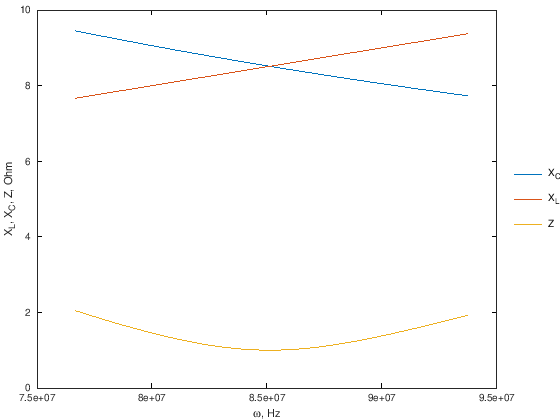

In [5]:
# Сетка значений в интервале omega
omega_vals = omega.inf : rad(omega)/20 : omega.sup;

# Значения ёмкостного сопротивления
XC = 1 ./ (omega_vals .* C);

# Значения индуктивного сопротивления
XL = omega_vals .* L;

# Значения полного сопротивления
Z = (R^2 + (XL - XC) .^ 2) .^ 0.5;

# График
plot(omega_vals, XC)
hold on
plot(omega_vals, XL)
plot(omega_vals, Z)
xlabel('\omega, Hz')
ylabel('X_L, X_C, Z, Ohm')
legend({'X_C','X_L','Z'},"location", "eastoutside")
legend boxoff

Определим границы изменения величины $Z$. 

В точке резонанса  $X_L = X_C$ суммарное 
сопротивление $LC$-части схемы равно нулю, а полное сопротивление равно активному, 
т.е. $Z = R$. Таким образом, 
$$\min_{\omega} Z = R = 1.$$

Величины индуктивного $X_L$ и ёмкостного $X_C$ сопротивлений зависят от частоты 
противоположным образом и монотонны. Поэтому максимальные значения величины 
$\Delta = | X_L - X_C | $ достигаются на одном из краёв диапазона $\mathbf{\omega}$: 
$$
\Delta_{max} = \max \left\lbrace \Delta( \underline {\mathbf{\omega}}), \Delta( \overline {\mathbf{\omega}}) 
\right\rbrace =  \max \left\lbrace 1.7822, 1.6401  \right\rbrace = 1.7822. $$

Соответственно, 
$$\max_{\omega} Z = \sqrt{R^2 + \Delta_{max}^2}.$$

In [6]:
# Нижняя граница полного сопротивления
Zmin = R

# Delta для левой границы интервала omega
DeltaLeft = abs(XL(1) - XC(1))

# Delta для правой границы интервала omega
DeltaRight = abs(XL(end) - XC(end))

# Максимум Delta - максимум значений на границах интервала omega
DeltaMax = max(DeltaLeft, DeltaRight)

# Верхняя граница полного сопротивления
Zmax = (R^2 + DeltaMax^2) ^ 0.5

# Точный интервал изменения полного сопротивления
Zexact = infsup(Zmin, Zmax)

rexact =  rad(Zexact)

Zmin =  1
DeltaLeft =  1.7822
DeltaRight =  1.6401
DeltaMax =  1.7822
Zmax =  2.0435
Zexact ⊂ [1, 2.0436]
rexact =  0.52177


Окончательно имеем точный интервал 
$$\mathbf{Z} = [1, 2.044].$$

### Вычисление интервального выражения

Вычислим также интервал $\mathbf{Z}$ по формуле [(2)](#Zseq), представленной двумя способами:

$$\mathbf{Z}_1 = \sqrt{R^2 + \left( \mathbf{\omega} L - \frac{1}{\mathbf{\omega} C} \right) ^2},$$ 

$$\mathbf{Z}_2 = \sqrt{R^2 + \mathbf{\omega}^2\left( L - \frac{1}{\mathbf{\omega}^2 C} \right)^2}.$$

In [7]:
# Выражение с двойным вхождением omega
Z1 = (R^2 + (omega * L - 1 / (omega * C))^2)^0.5

# Выражение c двойным вхождением квадрата omega
Z2 = (R^2 + omega^2 * (L - 1 / (omega^2 * C))^2)^0.5

# Радиусы интервалов
r1 = rad(Z1)
r2 = rad(Z2)

Z1 ⊂ [1, 2.0436]
Z2 ⊂ [1, 2.3968]
r1 =  0.52177
r2 =  0.69838


Нижние величины интервалов $Z_1, \ Z_2$ соответствуют частотному резонансу $X_L=X_C$ в середине диапазона $\mathbf{\omega}$, верхние относятся к краям выбранного диапазона, иначе --- расстройке резонанса. 

Значение выражения $Z_1$ в точности совпадает с точным интервалом изменения значений полного сопротивления, полученным аналитически. Радиус значения выражения $Z_2$ больше в связи с дополнительным умножением на величину $\omega^2$.


<a id='refs'></a>
## Публикации

1. <a id='SharyBook'></a> Шарый С.П. *Конечномерный интервальный анализ.* -- ФИЦ ИВТ: 
Новосибирск, 2021.  
http://www.nsc.ru/interval/Library/InteBooks/SharyBook.pdf 

2. <a id='YavorskiDetlaf'></a> Яворский Б.М., Детлаф А.А. *Справочник по физике для инженеров и студентов ВУЗов*. -- Москва: Наука, 1968 (*а также последующие издания*). 
